In [17]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [48]:
zip = zipfile.ZipFile('../data/archive.zip')
fp = zip.open('Historical Product Demand.csv') 
df = pd.read_csv(fp)

categories = {c: i for i, c in enumerate(set(df.Product_Category))}

df.dropna(subset=['Date'], inplace=True)
df.dropna(subset=['Order_Demand'], inplace=True)

df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')

df['Category'] = df.Product_Category.apply(lambda x: categories[x])
df['Date'] = pd.to_datetime(df['Date']) 
df['Months'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df['Weeks']  = df['Date'].dt.to_period('W').dt.to_timestamp()

In [49]:
weekly = df[(df.Warehouse == 'Whse_A') & (df.Date > '2012-01-01')][['Weeks', 'Order_Demand']].groupby('Weeks').sum().reset_index().sort_values('Weeks')
monthly = df[(df.Warehouse == 'Whse_A') & (df.Date > '2012-01-01')][['Months', 'Order_Demand']].groupby('Months').sum().reset_index().sort_values('Months')

<Axes: xlabel='Months'>

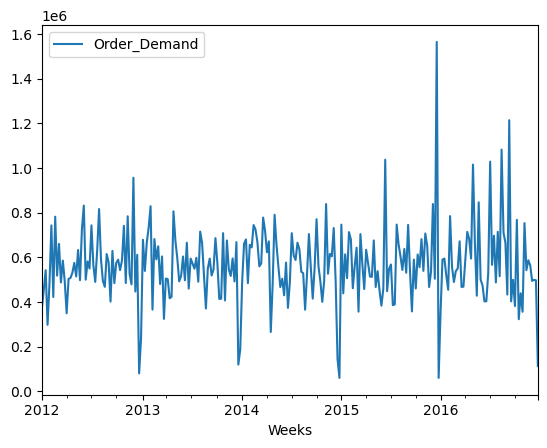

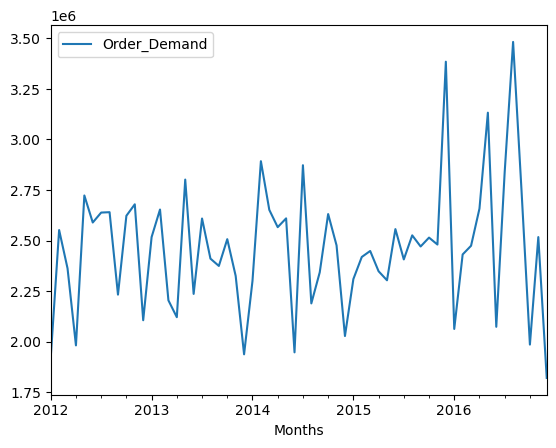

In [50]:
weekly.plot(x ='Weeks', y='Order_Demand')
monthly.plot(x ='Months', y='Order_Demand')

In [52]:
weekly = df[(df.Warehouse == 'Whse_A') & (df.Date > '2012-01-01')][['Weeks', 'Order_Demand','Category' ]].groupby(['Weeks', 'Category']).sum().reset_index().sort_values('Weeks')
monthly = df[(df.Warehouse == 'Whse_A') & (df.Date > '2012-01-01')][['Months', 'Order_Demand', 'Category']].groupby(['Months', 'Category']).sum().reset_index().sort_values('Months')

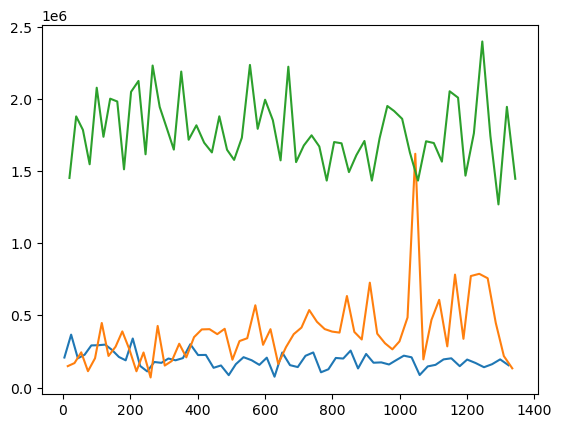

In [63]:
for _, i in categories.items():
    if monthly[monthly.Category == i].Order_Demand.sum() > 10000000:
        plt.plot(monthly[monthly.Category == i].Order_Demand)
plt.show()